In [10]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'INR'
    }
    headers = {
        'Content-Type': 'application/json',
        'X-CMC_PRO_API_KEY': 'cf1a34bf-ac26-4210-8a03-db447ce144d6',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data
    df = pd.json_normalize(data['data'])
    
    # Here it adds the column of timestamp
    df2 = df["timestamp"] = pd.to_datetime('now')

    #df_append = pd.DataFrame(df2)
    df3 = pd.concat([df, df2])

In [12]:
import os
from time import time
from time import sleep

#count = 1

for i in range(333): # the reason behind 333 is CMC api has a limit of 333 times of hitting the website/to pull data per day
    api_runner()
    print('API runner completed successfully')
    #count += 1
    sleep(3) #sleep for 1 min
exit()

TypeError: cannot concatenate object of type '<class 'pandas._libs.tslibs.timestamps.Timestamp'>'; only Series and DataFrame objs are valid

In [1]:
import time
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '10',
        'convert': 'INR'
    }
    headers = {
        'Content-Type': 'application/json',
        'X-CMC_PRO_API_KEY': 'cf1a34bf-ac26-4210-8a03-db447ce144d6',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        response.raise_for_status()  # Raise an error for bad responses
        data = response.json()  # Directly parse JSON
        
        # Normalize the data into a DataFrame
        df = pd.json_normalize(data['data'])
        
        # Add a timestamp column
        df['timestamp'] = pd.to_datetime('now')  # Add the current timestamp as a new column
        
        return df  # Return the DataFrame for further processing
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error occurred: {e}")
        return None  # Return None if an error occurs
    except json.JSONDecodeError:
        print("Failed to decode JSON response.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

def save_to_excel(df, file_path):
    if not os.path.isfile(file_path):
        df.to_csv(file_path, header='clumn_names', index=False)
    else:
        df.to_csv(file_path, mode='a', header=False, index=False)


    #if os.path.exists(file_path):
     #   with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer: # Append to the existing file
      #      df.to_excel(writer, sheet_name='Sheet1', header=False, index=False)  # Append without headers
   # else:
       # with pd.ExcelWriter(file_path, engine='openpyxl') as writer: # Create a new file
      #      df.to_excel(writer, sheet_name='Sheet1', header='True', index=False)  # Write with headers


existing_df = pd.DataFrame()   # Initialize an empty DataFrame or load existing data

excel_path = r"D:\Alex_tutorial\Python\API\api.csv"

count = 1

if __name__ == "__main__":
    for i in range(333):
        new_df = api_runner()
        if new_df is not None:
            existing_df = pd.concat([existing_df, new_df], ignore_index=True)  # Append the new DataFrame to the existing one
            print(f'API runner completed {count} times successfully')
            count += 1

            save_to_excel(existing_df, excel_path) #here saving the df to excel
            
            #print(existing_df)  # Print the updated DataFrame
        else:
            print("Failed to retrieve data.")
        
        time.sleep(3)  # Pause between requests

API runner completed 1 times successfully
API runner completed 2 times successfully


KeyboardInterrupt: 

In [9]:
df1 = pd.read_csv(excel_path)
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11840,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.979585e+07,1.979585e+07,...,55.6665,1.807565e+14,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
1,1027,Ethereum,ETH,ethereum,9680,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204469e+08,1.204469e+08,...,12.9490,3.964048e+13,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
2,825,Tether USDt,USDT,tether,108383,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.401337e+11,1.434428e+11,...,3.8820,1.216440e+13,NaN,2024-12-14T16:35:57.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-14 22:07:12.320119
3,52,XRP,XRP,xrp,1477,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.718787e+10,9.998686e+10,...,3.8018,2.034330e+13,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
4,5426,Solana,SOL,solana,809,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.790254e+08,5.901021e+08,...,2.9346,1.106437e+13,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440084e+08,1.440084e+08,...,2.8456,8.709132e+12,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
6,74,Dogecoin,DOGE,dogecoin,1128,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.471988e+11,1.471988e+11,...,1.6040,4.910193e+12,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
7,3408,USDC,USDC,usd-coin,23834,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.197459e+10,4.197459e+10,...,1.1629,3.560012e+12,NaN,2024-12-14T16:35:57.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-14 22:07:12.320119
8,2010,Cardano,ADA,cardano,1389,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.511273e+10,4.499506e+10,...,1.0433,4.093278e+12,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119
9,1958,TRON,TRX,tron,1082,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.624397e+10,8.624398e+10,...,0.6740,2.063251e+12,NaN,2024-12-14T16:35:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-14 22:07:12.320119


In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)   # here formating the scientific notation numbers in the entire dataframe

In [13]:
pd.set_option('display.max_columns', None)

In [15]:
existing_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11840,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19796178.00,19796178.00,False,NaN,1,None,None,None,2024-12-15T06:06:00.000Z,8656514.00,3277005206516.82,-33.24,-0.34,0.31,2.51,16.03,51.84,74.06,171365892027847.47,55.71,181786794025836.75,None,2024-12-15T06:06:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-15 11:37:52.709529
1,1027,Ethereum,ETH,ethereum,9680,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120448515.53,120448515.53,True,NaN,2,None,None,None,2024-12-15T06:07:00.000Z,329975.87,2345491133372.42,-18.74,-0.23,-0.91,-2.06,26.84,48.49,69.76,39745104019911.04,12.92,39745104019911.41,None,2024-12-15T06:06:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-15 11:37:52.709529
2,825,Tether USDt,USDT,tether,108387,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140253672849.48,143442815980.75,True,NaN,3,None,None,None,2024-12-15T06:07:00.000Z,84.78,8547786194759.27,-25.01,-0.00,-0.01,-0.12,-0.07,-0.04,-0.02,11891390496277.42,3.87,12161781606556.75,None,2024-12-15T06:06:57.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-15 11:37:52.709529
3,52,XRP,XRP,xrp,1477,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,57187870382.00,99986858106.00,False,NaN,4,None,None,None,2024-12-15T06:07:00.000Z,206.78,550581082107.17,-36.71,-0.10,-2.67,-4.11,199.84,349.16,325.06,11825446096161.92,3.84,20678241762057.28,None,2024-12-15T06:06:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-15 11:37:52.709529
4,5426,Solana,SOL,solana,809,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479040255.16,590096867.63,True,NaN,5,None,None,None,2024-12-15T06:07:00.000Z,18647.89,241268162763.53,-25.35,-0.40,-2.85,-7.39,4.95,42.40,67.77,8933091789844.78,2.90,11004063701812.08,None,2024-12-15T06:06:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-15 11:37:52.709529
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008355.41,144008355.41,False,NaN,6,None,None,None,2024-12-15T06:07:00.000Z,60577.53,153276535941.00,-28.45,-0.33,-1.82,-4.16,15.38,20.52,30.53,8723670275020.45,2.84,8723670275020.72,None,2024-12-15T06:06:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-15 11:37:52.709529
6,74,Dogecoin,DOGE,dogecoin,1128,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147206376383.71,147206376383.71,True,NaN,7,None,None,None,2024-12-15T06:07:00.000Z,33.85,267341133732.72,-12.11,-0.20,-2.66,-14.33,7.75,237.37,292.00,4983109235850.67,1.62,4983109235850.93,None,2024-12-15T06:06:57.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-15 11:37:52.709529
7,3408,USDC,USDC,usd-coin,23847,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42006509602.14,42006509602.14,False,NaN,8,None,None,None,2024-12-15T06:07:00.000Z,84.81,515290694470.30,-32.99,0.01,0.03,-0.01,-0.00,-0.01,0.02,3562609293496.92,1.16,3562609293496.98,None,2024-12-15T06:06:57.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-15 11:37:52.709529
8,2010,Cardano,ADA,cardano,1389,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35112728715.28,44995057356.93,False,NaN,9,None,None,None,2024-12-15T06:07:00.000Z,

In [17]:
df2 = existing_df.groupby('name', sort=False)[['quote.INR.percent_change_1h','quote.INR.percent_change_24h','quote.INR.percent_change_7d','quote.INR.percent_change_30d','quote.INR.percent_change_60d','quote.INR.percent_change_90d']].mean()
df2

,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d
name,,,,,,
Bitcoin,-0.34,0.31,2.51,16.03,51.84,74.06
Ethereum,-0.23,-0.91,-2.06,26.84,48.49,69.76
Tether USDt,-0.00,-0.01,-0.12,-0.07,-0.04,-0.02
XRP,-0.10,-2.67,-4.11,199.84,349.16,325.06
Solana,-0.40,-2.85,-7.39,4.95,42.40,67.77
BNB,-0.33,-1.82,-4.16,15.38,20.52,30.53
Dogecoin,-0.20,-2.66,-14.33,7.75,237.37,292.00
USDC,0.01,0.03,-0.01,-0.00,-0.01,0.02
Cardano,-0.03,-4.85,-9.57,73.68,201.17,220.21


In [19]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.INR.percent_change_1h     -0.34
             quote.INR.percent_change_24h     0.31
             quote.INR.percent_change_7d      2.51
             quote.INR.percent_change_30d    16.03
             quote.INR.percent_change_60d    51.84
             quote.INR.percent_change_90d    74.06
Ethereum     quote.INR.percent_change_1h     -0.23
             quote.INR.percent_change_24h    -0.91
             quote.INR.percent_change_7d     -2.06
             quote.INR.percent_change_30d    26.84
             quote.INR.percent_change_60d    48.49
             quote.INR.percent_change_90d    69.76
Tether USDt  quote.INR.percent_change_1h     -0.00
             quote.INR.percent_change_24h    -0.01
             quote.INR.percent_change_7d     -0.12
             quote.INR.percent_change_30d    -0.07
             quote.INR.percent_change_60d    -0.04
             quote.INR.percent_change_90d    -0.02
XRP          quote.INR.percent_change_1h

In [21]:
type(df3)

pandas.core.series.Series

In [122]:
type(df2)

pandas.core.frame.DataFrame

In [23]:
df4 = df3.to_frame(name='values')
df4

values
name                                            
Bitcoin     quote.INR.percent_change_1h    -0.34
            quote.INR.percent_change_24h    0.31
            quote.INR.percent_change_7d     2.51
            quote.INR.percent_change_30d   16.03
            quote.INR.percent_change_60d   51.84
            quote.INR.percent_change_90d   74.06
Ethereum    quote.INR.percent_change_1h    -0.23
            quote.INR.percent_change_24h   -0.91
            quote.INR.percent_change_7d    -2.06
            quote.INR.percent_change_30d   26.84
            quote.INR.percent_change_60d   48.49
            quote.INR.percent_change_90d   69.76
Tether USDt quote.INR.percent_change_1h    -0.00
            quote.INR.percent_change_24h   -0.01
            quote.INR.percent_change_7d    -0.12
            quote.INR.percent_change_30d   -0.07
            quote.INR.percent_change_60d   -0.04
            quote.INR.percent_change_90d   -0.02
XRP         quote.INR.percent_change_1h    -0.10
            quote.INR.percent_change_24h   -2.67
            quote.INR.percent_change_7d    -4.11
            quote.INR.percent_change_30d  199.84
            quote.INR.percent_change_60d  349.16
            quote.INR.percent_change_90d  325.06
Solana      quote.INR.percent_change_1h    -0.40
            quote.INR.percent_change_24h   -2.85
            quote.INR.percent_change_7d    -7.39
            quote.INR.percent_change_30d    4.95
            quote.INR.percent_change_60d   42.40
            quote.INR.percent_change_90d   67.77
BNB         quote.INR.percent_change_1h    -0.33
            quote.INR.percent_change_24h   -1.82
            quote.INR.percent_change_7d    -4.16
            quote.INR.percent_change_30d   15.38
            quote.INR.percent_change_60d   20.52
            quote.INR.percent_change_90d   30.53
Dogecoin    quote.INR.percent_change_1h    -0.20
            quote.INR.percent_change_24h   -2.66
            quote.INR.percent_change_7d   -14.33
            quote.INR.percent_change_30d    7.75
            quote.INR.percent_change_60d  237.37
            quote.INR.percent_change_90d  292.00
USDC        quote.INR.percent_change_1h     0.01
            quote.INR.percent_change_24h    0.03
            quote.INR.percent_change_7d    -0.01
            quote.INR.percent_change_30d   -0.00
            quote.INR.percent_change_60d   -0.01
            quote.INR.percent_change_90d    0.02
Cardano     quote.INR.percent_change_1h    -0.03
            quote.INR.percent_change_24h   -4.85
            quote.INR.percent_change_7d    -9.57
            quote.INR.percent_change_30d   73.68
            quote.INR.percent_change_60d  201.17
            quote.INR.percent_change_90d  220.21
TRON        quote.INR.percent_change_1h    -0.35
            quote.INR.percent_change_24h   -3.92
            quote.INR.percent_change_7d   -11.17
            quote.INR.percent_change_30d   57.73
            quote.INR.percent_change_60d   76.47
            quote.INR.percent_change_90d   88.95

In [25]:
df4.count()

values    60
dtype: int64

In [27]:
index = pd.Index(range(60))

df5 = df4.set_index(index)
df5

,values
0,-0.34
1,0.31
2,2.51
3,16.03
4,51.84
5,74.06
6,-0.23
7,-0.91
8,-2.06
9,26.84


In [29]:
df6 = df4.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.INR.percent_change_1h,-0.34
1,Bitcoin,quote.INR.percent_change_24h,0.31
2,Bitcoin,quote.INR.percent_change_7d,2.51
3,Bitcoin,quote.INR.percent_change_30d,16.03
4,Bitcoin,quote.INR.percent_change_60d,51.84
5,Bitcoin,quote.INR.percent_change_90d,74.06
6,Ethereum,quote.INR.percent_change_1h,-0.23
7,Ethereum,quote.INR.percent_change_24h,-0.91
8,Ethereum,quote.INR.percent_change_7d,-2.06
9,Ethereum,quote.INR.percent_change_30d,26.84


In [31]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.INR.percent_change_1h,-0.34
1,Bitcoin,quote.INR.percent_change_24h,0.31
2,Bitcoin,quote.INR.percent_change_7d,2.51
3,Bitcoin,quote.INR.percent_change_30d,16.03
4,Bitcoin,quote.INR.percent_change_60d,51.84
5,Bitcoin,quote.INR.percent_change_90d,74.06
6,Ethereum,quote.INR.percent_change_1h,-0.23
7,Ethereum,quote.INR.percent_change_24h,-0.91
8,Ethereum,quote.INR.percent_change_7d,-2.06
9,Ethereum,quote.INR.percent_change_30d,26.84


In [33]:
df7['percent_change'] = df7['percent_change'].replace('quote.INR.percent_change_1h','1h')
df7['percent_change'] = df7['percent_change'].replace('quote.INR.percent_change_24h','24h')
df7['percent_change'] = df7['percent_change'].replace('quote.INR.percent_change_7d','7d')
df7['percent_change'] = df7['percent_change'].replace('quote.INR.percent_change_30d','30d')
df7['percent_change'] = df7['percent_change'].replace('quote.INR.percent_change_60d','60d')
df7['percent_change'] = df7['percent_change'].replace('quote.INR.percent_change_90d','90d')

In [35]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.34
1,Bitcoin,24h,0.31
2,Bitcoin,7d,2.51
3,Bitcoin,30d,16.03
4,Bitcoin,60d,51.84
5,Bitcoin,90d,74.06
6,Ethereum,1h,-0.23
7,Ethereum,24h,-0.91
8,Ethereum,7d,-2.06
9,Ethereum,30d,26.84


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

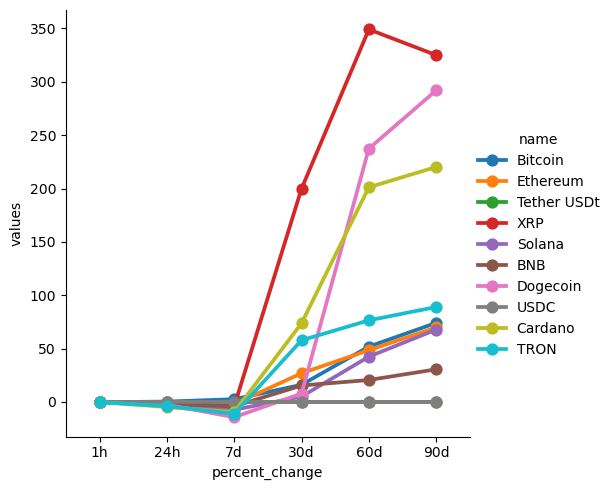

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')